Importamos la libreria Pandas

In [2]:
import pandas as pd

Leemos el dataset y lo visualizamos

In [3]:
dataset=pd.read_excel("C:/Users/Yaely/Desktop/Proyecto Matematica Discreta/Libro1.xlsx")
dataset

,Nombre,Distancia,Hora_Salida,Hora_num,Dia,Tráfico,Min_8_AM
0,DARLENE,8.3,06:40:00,0.277778,martes,no,-10
1,DARLENE,8.3,06:50:00,0.284722,jueves,si,-10
2,Jack,9.0,06:50:00,0.284722,martes,si,0
3,Jack,9.0,06:55:00,0.288194,viernes,si,5
4,Jean Pool,6.9,07:00:00,0.291667,viernes,si,-10
5,Nicolas,4.8,07:20:00,0.305556,miercoles,no,10
6,Alejos,8.1,06:50:00,0.284722,lunes,si,5
7,Guillermo,7.8,07:00:00,0.291667,jueves,no,5
8,Sergio,47.0,06:15:00,0.260417,sabado,no,-10
9,Sergio,47.0,06:00:00,0.250000,lunes,si,10


In [4]:
dataset.dtypes

Nombre          object
Distancia      float64
Hora_Salida     object
Hora_num       float64
Dia             object
Tráfico         object
Min_8_AM         int64
dtype: object

Eliminamos Nombre y Hora_Salida
Transformamos variables cualitativas a cuantitativas

In [5]:
dataset=dataset.drop(['Nombre','Hora_Salida'],axis=1)
dataset['Dia'] = dataset['Dia'].map({'lunes':0,'martes':1,'miercoles':2,'jueves':3,'viernes':4,'sabado':5})
dataset['Tráfico']=dataset['Tráfico'].map({'no':0,'si':1})

Partimos la data entre los parametros y la etiqueta

In [6]:
var_in=dataset.drop(columns='Min_8_AM')
objetivo=dataset.Min_8_AM

Importamos el metodo para separacion de dataset 

In [7]:
from sklearn.model_selection import train_test_split

Dividimos el dataset entre data de entrenamiento y data de prueba, en porporcion de 4 a 1 

In [8]:
X_train,X_test,y_train,y_test= train_test_split(var_in,objetivo,test_size=0.2)

Importamos el modelo

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model= DecisionTreeClassifier(max_depth=8)

Corremos el modelo con los datos de entrenamiento

In [20]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

Importamos la libreria matplotlib para visualizar el Arbol de Desicion

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

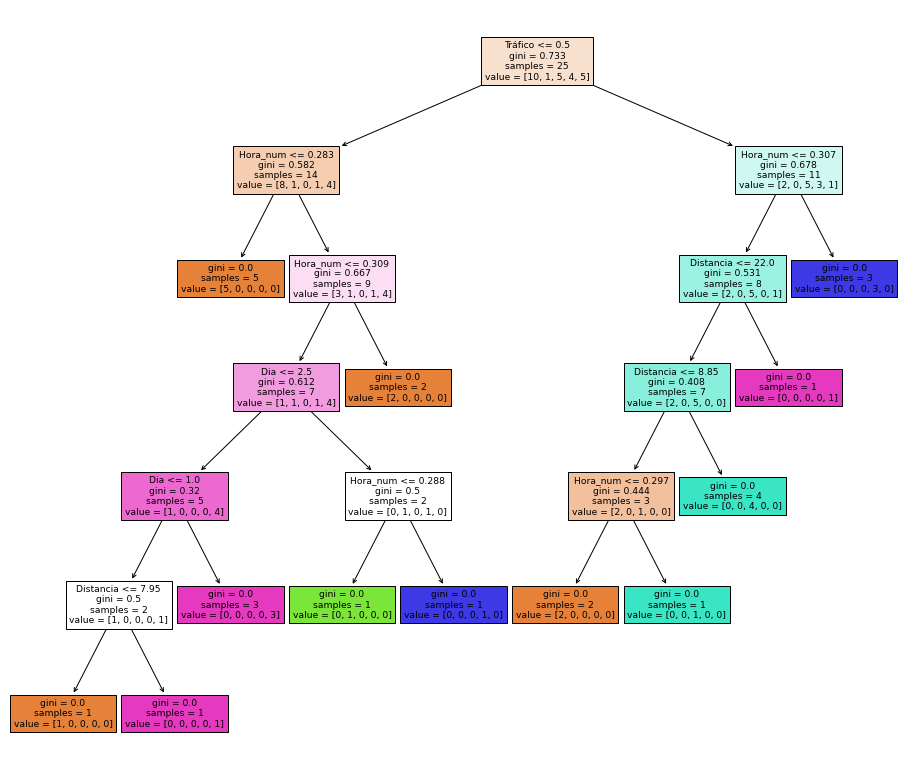

In [22]:
plt.figure(figsize=(16,14))
plot_tree(decision_tree=model, feature_names=var_in.columns,filled=True);

Usamos el modelo para predecir la data de prueba

In [23]:
prediccion=model.predict(X_test)

In [24]:
a = X_test.sample()
a

,Distancia,Hora_num,Dia,Tráfico
3,9.0,0.288194,4,1


In [25]:
model.predict(a)

array([0], dtype=int64)

Calculamos la tasa de aciertos del modelo

In [26]:
model.score(X_test,y_test)

0.2857142857142857

In [27]:
(prediccion==y_test).sum()/y_test.shape[0]

0.2857142857142857